In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder 
from sklearn.model_selection import train_test_split



[]

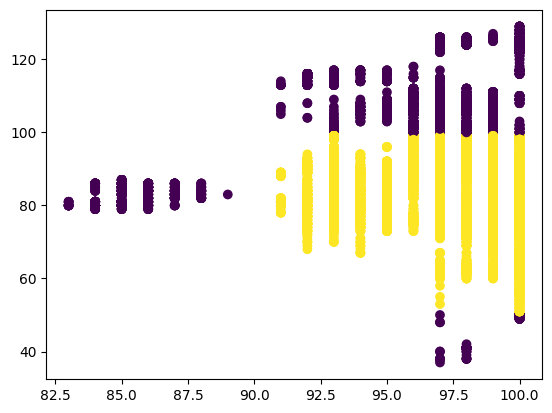

In [16]:
#create some data and plot the graph
training_dataset = pd.read_csv('Training_heart.csv')
y = training_dataset.drop([' HEALTHY HEART', ' SpO2'], axis=1)
x = training_dataset.drop([' HEALTHY HEART',' PULSE'], axis=1)
labels = training_dataset[' HEALTHY HEART']

plt.scatter(x, y, c=labels)
#plot a line that splits the data into 2 classes
plt.plot()

In [17]:
def tranformation_function(x, y):
    """This function converts the 2D data into 3D"""
    data = np.c_[(x, y)] #zips the x and y value
    #check if the data has more than 2 observations
    if len(data) > 2:
        x1 = data[:, 0] ** 2
        x2 = np.sqrt(2) * data[:, 0] * data[:, 1]
        x3 = data[:, 1] ** 2
    else:
        x1 = data[0] ** 2
        x2 = np.sqrt(2) * data[0] * data[1]
        x3 =  data[1] ** 2
    translated_data = np.array([x1, x2, x3])
    
    return translated_data

In [18]:
print(f'The shape of the data before transformation is {np.c_[(x, y)].shape}')
#call the transformation function on the data
data_3d = tranformation_function(x, y)
#check the dimension of the data
print(f'The shape of the data after transformation is {data_3d.shape}')

The shape of the data before transformation is (24403, 2)
The shape of the data after transformation is (3, 24403)


In [ ]:
fig, ax = plt.subplots()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(data_3d[0], data_3d[1], data_3d[2], c=labels)
 
ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
ax.set_zlabel('Z axis')
 
plt.show()

In [22]:
df = pd.read_csv('Training_heart.csv')
#print the first 5 rows of the data

print(df.head())
print(df.shape)
print(df.isnull().sum())

    PULSE   SpO2   HEALTHY HEART
0    93.0   97.0               1
1    93.0   97.0               1
2    93.0   97.0               1
3    93.0   97.0               1
4    93.0   97.0               1
(24403, 3)
 PULSE            0
 SpO2             0
 HEALTHY HEART    0
dtype: int64


In [23]:
#split the data into targets(y) and features (X)
target = df[' HEALTHY HEART'] 
features = df.drop([' HEALTHY HEART'], axis=1)

In [26]:
#split the data into train and test data
X_train, X_test, y_train, y_test = train_test_split(features,target, test_size=0.2, random_state=42)

In [27]:
print(X_train.shape)
print(X_test.shape)

(19522, 2)
(4881, 2)


In [41]:
feature_columns = tf.contrib.layers.real_valued_column('x', dimension=2)


AttributeError: module 'tensorflow' has no attribute 'contrib'